## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [1]:
import numpy as np
import random
import scipy.stats as sps

## Задача 0
в этом разделе нам хотелось бы увидеть базовые наваки в языке програмирования Python

### __0.1__ 
Дано натуральное число. Требуется определить, является ли год с данным номером високосным. Если год является високосным, то выведите YES, иначе выведите NO. Напомним, что в соответствии с григорианским календарем, год является високосным, если его номер кратен 4, но не кратен 100, а также если он кратен 400.

In [2]:
def is_leap_year(year):
    if year % 400 == 0 or (year % 4 == 0 and year % 100 != 0):
        print("YES")
    else:
        print("NO")

In [3]:
is_leap_year(1000)
is_leap_year(400)
is_leap_year(1001)
is_leap_year(1004)

NO
YES
NO
YES


### __0.2__
Дано натуральное число. Найдите число десятков в его десятичной записи.

In [4]:
def num_decs(number):
    return (number // 10) % 10

In [5]:
num_decs(15634780), num_decs(101)

(8, 0)

### __0.3__
По данному натуральном n вычислите сумму 1!+2!+3!+...+n!. В решении этой задачи можно использовать только один цикл. Пользоваться математической библиотекой math в этой задаче запрещено.

In [6]:
def factorial_sum(n):
    cur_sum = 0
    fact = 1
    for i in range(1, n + 1):
        fact *= i
        cur_sum += fact
    return cur_sum

In [7]:
factorial_sum(4), factorial_sum(10)

(33, 4037913)

### __0.4__
 Определить, является ли введённая строка палиндромом (то есть одинаково читается с обеих сторон).

In [8]:
def is_palindrome(s):
    s = s.replace(' ','').lower()
    return s == s[::-1]

In [9]:
print(is_palindrome("бащаб"))
print(is_palindrome("А роза упала на лапу Азора"))

True
True


# Задача 1
В первой задаче вам предлагается перемножить две матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [10]:
import numpy as np

In [11]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((100,1000))
b = np.random.sample((1000,100))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
# тут можно писать код 
# ========

In [12]:
def mult(a, b):
    # здесь напишите перемножение матриц без 
    # использования NumPy (с помощью тройного цикла) и верните результат
    rows_a = len(a) 
    cols_a = len(a[0])
    rows_b = len(b)
    cols_b = len(b[0])

    if cols_a != rows_b:
        raise ValueError("matricies cant bee multiplied")
    
    c = [[0] * cols_b for _ in range(rows_a)]  # вектор из нулей можно создать с помощью оператора *
                                               # вектор из векторов так создавать нельзя, потому что 
                                               # будет ошибка, связанная с тем, что это на самом деле 
                                               # один и тот же объект, повторенный несколько раз
                                               # а нам нужны разные строки в итоговой матрице
    for i in range(rows_a): 
        for j in range(cols_b):
            for k in range(rows_b):
                c[i][j] += a[i][k] * b[k][j]
    return c

In [13]:
def np_mult(a, b):
    return a @ b

In [14]:
# Превратим матрицы в листы, чтобы протестировать функцию без np
a_list = [[x for x in row] for row in a]
b_list = [[x for x in row] for row in b]

In [15]:
%%time
# засечем время работы функции без NumPy
mult_list = mult(a_list, b_list)

CPU times: user 3.2 s, sys: 16.6 ms, total: 3.22 s
Wall time: 3.24 s


In [16]:
%%time
# засечем время работы функции с NumPy
mult_np = np_mult(a, b)

CPU times: user 1.93 ms, sys: 1.08 ms, total: 3.01 ms
Wall time: 937 µs


In [17]:
np.allclose(np.array(mult_list), mult_np)  # проверяем что реализовали посчитали функции

True

## Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [18]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    return np.cumsum(A) / np.arange(1, len(A) + 1)

In [19]:
# функция без NumPy
def stupid_sec_av(A):
    cur_sum = 0
    ans = [0] * len(A)
    for i, elem in enumerate(A):
        cur_sum += elem
        ans[i] = cur_sum / (i + 1)
    return ans

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = np.random.rand(10 ** 6) 
A_list = list(A)

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A_list)
#проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 8.54 ms, sys: 3.53 ms, total: 12.1 ms
Wall time: 12.1 ms
CPU times: user 348 ms, sys: 11 ms, total: 359 ms
Wall time: 359 ms


0.0

## Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить (конкатенировать) массив X с преобразованным X и вывести в обратном порядке. 

In [20]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    N = np.copy(X)
    N[1::2] = a
    N[::2] = np.flip(N[::2] ** 3)
    return np.hstack((np.array(X) , N))[::-1]

In [21]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    N = list(np.copy(X))
    N[1::2] = [a for _ in range(len(N[1::2]))]
    N[::2] = [x**3 for x in N[::2]][::-1]
    return (X + N)[::-1]

In [22]:
X = np.random.rand(10 ** 7)
X_list = list(X)
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X, a=-10)
%time S2 = stupid_transformation(X_list, a=-10)
# проверим корректность:
print(np.abs(S1 - S2).sum())

CPU times: user 218 ms, sys: 96.9 ms, total: 315 ms
Wall time: 316 ms
CPU times: user 3.04 s, sys: 307 ms, total: 3.35 s
Wall time: 3.36 s
0.0


Почему методы ***numpy*** оказываются эффективнее?

In [23]:
# 1) Numpy поддерживает векторные операции (вычисления выполняются параллельно).
# 2) Numpy реализован на С++ (программы на нем работают сильно быстрее, чем на Python)
# 3) Элементы массивов в Numpy лежат в соседних участкам памяти, тогда как в list-ах Python-а 
# лежат ссылки на разные объекты, из-за чего приходится делать больше операций чтения/записей в процессор

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать, но в то же время не являются обязательными.

## Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***, найти которую можно в ноутбуке, посвященному matplotlib), и подать такую сетку на вход функции отрисовки.

In [24]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

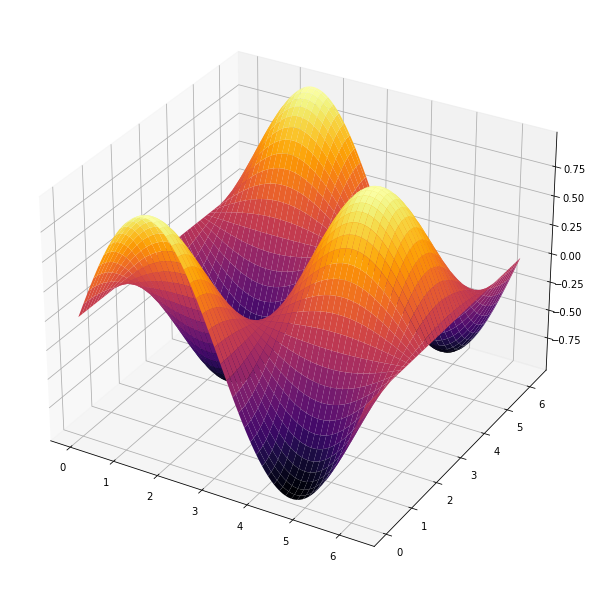

In [25]:
grid_x, grid_y = np.meshgrid(np.linspace(0, 2 * np.pi, 100), np.linspace(0, 2 * np.pi, 100))

draw_f(grid_x, grid_y)

## Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

Загрузим картинку. Если эта ячейка не сработает, смотрите дальше:

In [ ]:
path_to_image = './image.jpg'
image_array = plt.imread(path_to_image)

Если Вы работаете в google colab или по каким-то еще причинам картинка с диска не загрузилась, можно попробовать загрузить через ссылку в интернете:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from PIL import Image
import requests
from io import BytesIO

path_to_image = 'https://github.com/hocop/sberbank_madmo/raw/master/day_1/homework/image.jpg'
# например: https://github.com/hocop/sberbank_madmo/raw/master/day_1/homework/image.jpg

response = requests.get(path_to_image)
img = Image.open(BytesIO(response.content))

image_array = np.array(img)

В любом случае, у Вас должен появиться объект `image_array`.  
Распечатаем его на экране:

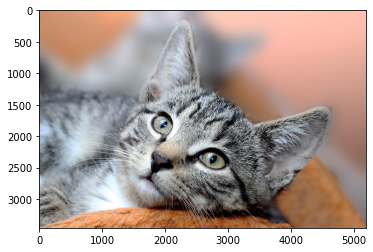

In [29]:
plt.imshow(image_array);

In [30]:
# Ваш код здесь
img = image_array.flatten()

In [31]:
# Здесь выведите размерность нового массива
img.shape

(53747712,)

## Задача 6*
Дан текст в виде строки. Напишите функцию, которая возвращает словарь, где ключами являются уникальные слова из этого текста, а значениями - число раз, которое данное слово встретилось в тексте. Считать, что слова разделяются пробелами.

Советую использовать модуль collections (он не требует дополнительной установки) и структуру данных Counter из него https://pythonworld.ru/moduli/modul-collections.html

In [32]:
from collections import Counter

In [33]:
def count_tokens(text):
    c = Counter(text.split(" "))
    return c

In [34]:
count_tokens("один два три пять четыре пять пять пять четыре четыре три один")

Counter({'один': 2, 'два': 1, 'три': 2, 'пять': 4, 'четыре': 3})

# Очень бонусная часть 
за решение этих задач количество бонусных баллов будет начисляться непропорционально потраченному времени. 

## Задача 7*

Составить описание класса для объектов-векторов, задаваемых координатами концов в N-мерном пространстве. Основой является список значений координат вектора. Обеспечить операции сложения и вычитания векторов с получением нового вектора (суммы или разности), вычисления скалярного произведения двух векторов, длины вектора, косинуса угла между векторами. Все операции, которые можно перегрузить с помощью магических методов, должны быть реализованы именно через них.

NumPy использовать нельзя, скорость работы методов в этом задании проверяться не будет, только правильность ответов

In [35]:
class Vector(object):
    def __init__(self, vector_dim_values, val=0):
        """
            Необходимо создать вектор размерности vector_dim_values, 
            заполнить все его координаты значениями val  
            и сохранить это в атрибут класса self.vector
        """
        self.vector = np.full(vector_dim_values, val)
        
        
    def __add__(self, other):
        '''
            Необходимо найти (поэлементную) сумму векторов self и other и вернуть его
        '''
        ans = [a + b for a, b in zip(self.vector, other.vector)]
        return ans
        
    def __sub__(self, other):
        '''
            Аналогично __add__, но разность
        '''
        ans = [a - b for a, b in zip(self.vector, other.vector)]
        return ans
        
    def __mul__(self, other):
        """
            Необходимо найти скалярное произведение векторов self и other и вернуть результат
        """
        ans = 0
        for a, b in zip(self.vector, other.vector):
            ans += (a * b)
        return ans

    
    def __len__(self):
        return len(self.vector)
    
    def __str__(self):
        """
            Вспомогательный метод для проверки результатов
            Можно использовать в своем коде как print(str(vector))
        """
        return str(self.vector)
    
    def cosine(self, other):
        """
            Необходимо вычислить косинус угла между векторами и вернуть результат. 
            Косинус вычисляется по формуле:
                cos(a, b) = <a, b> / sqrt(<a, a> <b, b>),
            где <a, b> - скалярное произведение векторов a и b.
        """
        nominator = self * other
        denominator = (self * self) * (other * other)
        return nominator / (denominator ** 0.5)

In [36]:
a = Vector(5, 1)
b = Vector(5, 2)
print(a + b)
print(a - b)
print(a * b)
print(a.cosine(b))
print(a.cosine(Vector(5, -2)))

[3, 3, 3, 3, 3]
[-1, -1, -1, -1, -1]
10
1.0
-1.0
